<a href="https://colab.research.google.com/github/victorlfcarvalho/album-da-copa-2022/blob/main/%C3%81lbum_da_Copa_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Álbum da Copa do Mundo 2022


## Perguntas:

####1. Quanto custa, em média, para completar o álbum?
####2. Quantos pacotes, em média, são necessários para completar o álbum?
####3. Qual a probabilidade de se gastar menos que a média para completar o álbum?
####4. Qual o valor médio gasto caso se esteja completando o álbum com 10 amigos?

In [5]:
#Informações gerais sobre o álbum (média nos valores monetários)
n_album = 670
preco_album = 12
preco_pacote = 4
cromos_pacote = 5

In [6]:
#Importando a biblioteca as bibliotecas
import numpy as np
import matplotlib.pyplot as plt


In [7]:
# Comprando figurinhas até completar o álbum
def SimulaAlbum():
  album = np.zeros(n_album)
  pacotes = 0
  while True:
    pacotinho = np.random.choice(np.arange(0, n_album), size = 5)
    pacotes += 1
    for i in [pacotinho]:
      album[i] += 1

    if np.all(album >= 1):
      break

#determinando custo do pacote
  custo = pacotes * preco_pacote + preco_album
  return custo, pacotes

SimulaAlbum()

(4172, 1040)

In [8]:
simulacoes = 10000
resultados = []

for i in range(simulacoes):
  resultados.append(SimulaAlbum()[0])
np.array(resultados).mean()

sim = np.array(resultados)

In [9]:
#questões 1 e 2

print('O valor médio gasto foi: ', round(np.array(sim).mean(),2))
print('O número de pacotes médio foi: ', round((np.array(sim).mean() - preco_album) / preco_pacote, 2))

O valor médio gasto foi:  3805.64
O número de pacotes médio foi:  948.41


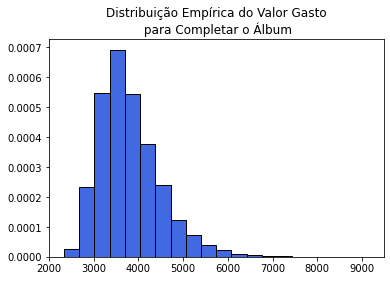

In [10]:
plt.hist(sim, bins = 20, density = True, color = 'royalblue', edgecolor = 'black')
plt.title('Distribuição Empírica do Valor Gasto\n para Completar o Álbum')
plt.show()

In [11]:
#questão 3 > probabilidade de gastar menos que a média

prob1 = sum(np.array(sim) < np.array(sim).mean() ) / simulacoes
prob2 = sum(np.array(sim) > np.array(sim).mean() ) / simulacoes


print('A probabilidade de se gastar menos que a média é {:.2f}%'.format(prob1*100))
print('A probabilidade de se gastar mais que a média é {:.2f}%'.format(prob2*100))


A probabilidade de se gastar menos que a média é 57.59%
A probabilidade de se gastar mais que a média é 42.41%


##Custo se tivermos 10 amigos para trocar figurinhas 

In [12]:
def SimulaAmigos1(n_amigos):
  album = np.zeros(n_album)
  pacotes = 0
  while True:
    pacotinho = np.random.choice(np.arange(0, n_album), size = 5)
    pacotes += 1
    for i in [pacotinho]:
      album[i] += 1

    if np.all(album >= n_amigos):
      break

  custo = pacotes * preco_pacote + preco_album
  return custo/n_amigos

#Para 10 amigos trocando figurinhas
SimulaAmigos1(10)

1163.6

In [13]:
simulacoes1 = 10000
resultados1 = []

for i in range(simulacoes1):
  resultados1.append(SimulaAmigos1(10))
np.array(resultados1).mean()

sim1 = np.array(resultados1)

#questão 4
print('O valor médio gasto para 10 amigos: ', round(np.array(sim1).mean(),2))

O valor médio gasto para 10 amigos:  1229.91
